# import lirbraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# load the data

In [4]:
df = pd.read_csv(r"SalaryData.csv")

# Explore the data

In [6]:
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
369,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
370,43.0,Male,Master's,Director of Operations,19.0,170000.0
371,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
372,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
373,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### handle null values

In [11]:
df.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [12]:
df.dropna(axis = 0, inplace = True)

In [13]:
df.shape

(373, 6)

In [14]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### handle dublicatese

In [16]:
df.duplicated().sum()

49

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.reset_index(drop = True)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
319,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
320,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
321,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
322,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


# try to handle the jop title

In [20]:
df["Job Title"].value_counts()

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

In [21]:
category = df["Job Title"].value_counts().index
values = df["Job Title"].value_counts().values

for i, j in zip(category, values):
    if j <= 6:
        df["Job Title"] = df["Job Title"].replace({i : "Other"})

In [22]:
df["Job Title"].value_counts()

Job Title
Other                       292
Director of Operations        9
Director of Marketing         8
Senior Marketing Manager      8
Senior Project Manager        7
Name: count, dtype: int64

In [23]:
df = pd.get_dummies(data = df, columns = ["Job Title"], drop_first = True)

In [24]:
bool_columns = df.select_dtypes(include = ["bool"]).columns
bool_columns

for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

<Axes: >

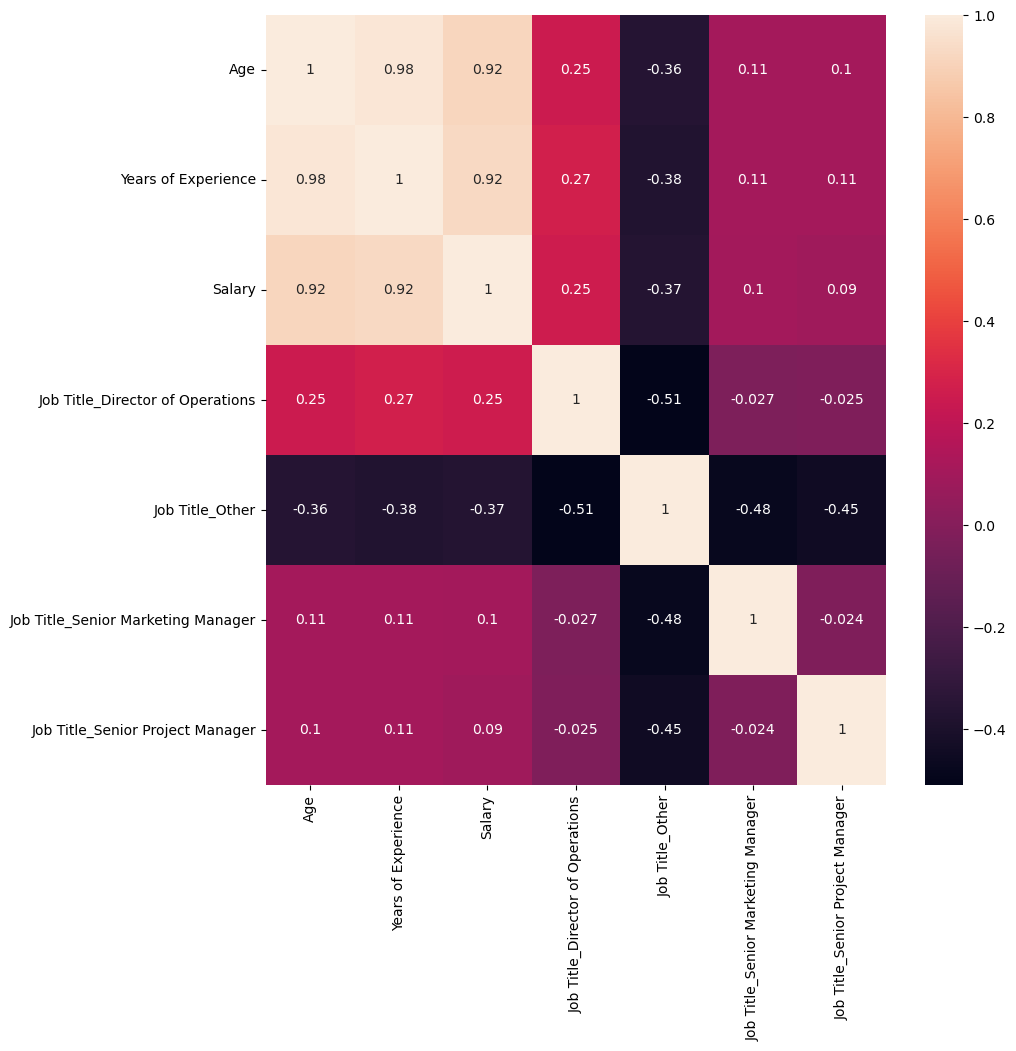

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(data = df.corr(numeric_only = True), annot = True)

### handle outlires

<Axes: >

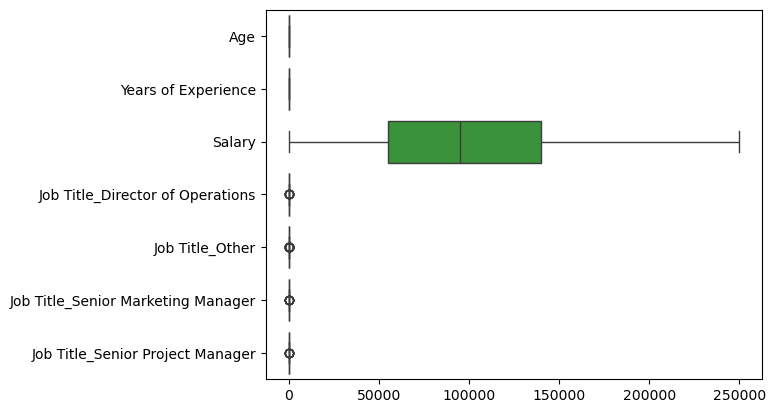

In [27]:
sns.boxplot(data = df, orient = "h")

### handle object columns

In [29]:
#pd.set_option('future.no_silent_downcasting', True)

# label encoder

In [31]:
df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})

C:\Users\Mx\AppData\Local\Temp\ipykernel_15728\3077849553.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})


# ordinal encoder

In [33]:
df["Education Level"].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [34]:
ordinal = df.groupby("Education Level")["Salary"].mean().sort_values(ascending = False)
print(ordinal)
print(ordinal.rank().astype(int))

df["Education Level"] = df["Education Level"].map(ordinal.rank().astype(int))

Education Level
PhD           158095.238095
Master's      127912.087912
Bachelor's     73902.356021
Name: Salary, dtype: float64
Education Level
PhD           3
Master's      2
Bachelor's    1
Name: Salary, dtype: int32


In [35]:
#df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

In [36]:
df.reset_index(drop = True)

,Age,Gender,Education Level,Years of Experience,Salary,Job Title_Director of Operations,Job Title_Other,Job Title_Senior Marketing Manager,Job Title_Senior Project Manager
0,32.0,1,1,5.0,90000.0,0,1,0,0
1,28.0,0,2,3.0,65000.0,0,1,0,0
2,45.0,1,3,15.0,150000.0,0,1,0,0
3,36.0,0,1,7.0,60000.0,0,1,0,0
4,52.0,1,2,20.0,200000.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
319,28.0,0,1,1.0,35000.0,0,1,0,0
320,36.0,1,1,8.0,110000.0,0,1,0,0
321,44.0,0,3,16.0,160000.0,0,1,0,0
322,31.0,1,1,3.0,55000.0,0,1,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 370
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 324 non-null    float64
 1   Gender                              324 non-null    int64  
 2   Education Level                     324 non-null    int32  
 3   Years of Experience                 324 non-null    float64
 4   Salary                              324 non-null    float64
 5   Job Title_Director of Operations    324 non-null    int64  
 6   Job Title_Other                     324 non-null    int64  
 7   Job Title_Senior Marketing Manager  324 non-null    int64  
 8   Job Title_Senior Project Manager    324 non-null    int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 24.0 KB


<Axes: xlabel='Age', ylabel='Count'>

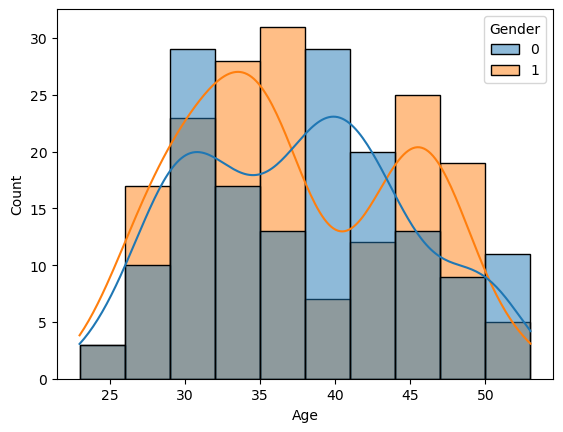

In [38]:
sns.histplot(data = df, x = df["Age"], kde = True, hue = "Gender")

<Axes: xlabel='Salary', ylabel='Count'>

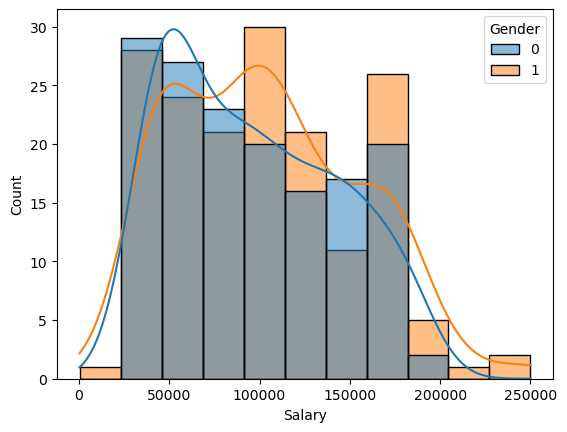

In [39]:
sns.histplot(data = df, x = df["Salary"], kde = True, hue = "Gender")

# split the data, standardization

In [70]:
x = df.drop("Salary", axis = 1)
y = df["Salary"]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 25 )

In [94]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [96]:
lr.score(x_train, y_train)

0.889871698405787

In [98]:
lr.score(x_test, y_test)

0.914590661799159

In [100]:
y_pred = lr.predict(x_test)

In [102]:
lr.score(x_test, y_pred)

1.0

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [106]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

212826245.9653465
10742.505607926047


In [441]:
residule = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
residule.head(20)

,y_test,y_pred
232,50000.0,52018.100716
118,45000.0,42391.771630
161,175000.0,176548.249321
102,150000.0,163308.241069
6,120000.0,123487.562021
245,95000.0,85740.499338
270,60000.0,53297.525725
39,160000.0,159693.188997
319,160000.0,143633.692933
294,60000.0,65594.368426


## polynomial

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)

In [110]:
x_train_poly, x_test_poly, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25, random_state = 25)

In [112]:
lr2 = LinearRegression()
lr2.fit(x_train_poly, y_train)

LinearRegression()

In [114]:
y_pred = lr2.predict(x_test_poly)

In [116]:
lr2.score(x_train_poly, y_train)

0.912653653018711

In [118]:
lr2.score(x_test_poly, y_test)

0.8794222706341609

In [120]:
lr2.score(x_test_poly, y_pred)

1.0

In [145]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

387941393.175583
12024.588477366253


In [460]:
residule2 = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
residule2.head(20)

,y_test,y_pred
232,50000.0,54520.503514
118,45000.0,45882.728696
161,175000.0,182971.302599
102,150000.0,164676.873069
6,120000.0,124856.923785
245,95000.0,85584.907730
270,60000.0,55278.714897
39,160000.0,168256.112927
319,160000.0,142423.029665
294,60000.0,59424.428498


# decision_Tree

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 25 )

In [125]:
from sklearn import tree

In [131]:
reg = tree.DecisionTreeRegressor()

In [135]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [137]:
reg.score(x_train, y_train)

0.9824837529223367

In [139]:
reg.score(x_test, y_test)

0.844315171272467

In [141]:
y_pred = reg.predict(x_test)

In [143]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

387941393.175583
12024.588477366253


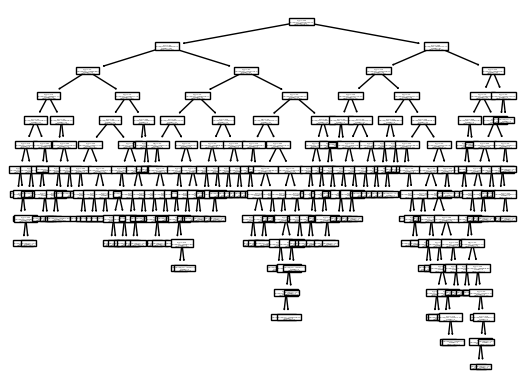

In [151]:
tree.plot_tree(reg)
plt.show()

# grid search and corss validation in a tree

In [160]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [164]:
reg = tree.DecisionTreeRegressor()

In [224]:
# corss validation
scores = cross_val_score(reg, x, y, scoring = "neg_mean_squared_error",cv = 3)

In [232]:
print(scores)
print(-scores.mean())

[-5.17720936e+08 -3.55493308e+08 -5.85788943e+08]
486334395.57613176


In [248]:
paramiters = {"max_depth" : [5, 7, 9, 12, 14],
             "min_samples_split" : [1,2,3]}

In [250]:
gridsearch = GridSearchCV(reg, paramiters, cv = 3, scoring = "neg_mean_squared_error")

In [252]:
gridsearch.fit(x_train, y_train)

C:\Users\Mx\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mx\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mx\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Mx\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mx\anaconda3\Lib\site-packages\sklearn\utils\_

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 7, 9, 12, 14],
                         'min_samples_split': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [254]:
gridsearch.best_params_

{'max_depth': 5, 'min_samples_split': 3}

In [256]:
gridsearch.best_score_

-426431961.4613971

In [266]:
model = gridsearch.best_estimator_

In [268]:
y_pred = model.predict(x_test)

In [270]:
model.score(x_train, y_train)

0.9410403341232255

In [272]:
model.score(x_test, y_test)

0.8551105266915534